#### Importing Lib

In [1]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

pd.options.display.float_format = '{:.2f}'.format

In [5]:
# Load clean telecom data file
telecom = pd.read_csv('telecom_churn_data_clean.csv', low_memory=False)
telecom.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.38  214.82  213.80         0.00         0.00         0.00   
1 1069.18 1349.85 3171.48        57.84        54.68        52.29   
2  378.72  492.22  137.36       413.69       351.03        35.08   
3  514.45  597.75  637.76       102.41       132.11        85.14   
4   74.35  193.90  366.97        48.96        50.66        33.58   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  fb_user_7  \
0          0.00          0.00          0.00           0.00  ...       1.00   
1        453.43        567.16        325.91          16.23  ...      -1.00   
2         94.66         80.63        136.48           0.00  ...       1.00   
3        757.93        896.68        983.39           0.00  ...      -1.00   
4         85.41         89.36        205.89           0.00  ...       1.00   

   fb_user_8  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
0       1.00  968       30.40        0.00      101.20        3.58   
1      -1.00  802       57.74       19.38       18.74        0.00   
2       1.00  315       21.03      910.65      122.16        0.00   
3      -1.00  720        0.00        0.00        0.00        0.00   
4       1.00  604       40.45       51.86        0.00        0.00   

   total_data_rech_8  amt_data_8  churn  
0             252.00    63504.00      1  
1               0.00        0.00      1  
2             207.00    24840.00      0  
3               0.00        0.00      0  
4             540.00   237060.00      0  

[5 rows x 149 columns]

In [6]:
print('Dataframe Shape: ', telecom.shape)
print("Dataframe Info: \n"); telecom.info()

Dataframe Shape:  (30001, 149)
Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 149 entries, arpu_6 to churn
dtypes: float64(123), int64(26)
memory usage: 34.1 MB


In [7]:
# Create X (independent variable) & y (dependent variable) 
df_telecom = telecom.drop(['churn'], axis=1)
X = telecom.drop(['churn'], axis=1)
y = telecom['churn']

In [8]:
X.shape

(30001, 148)

### Data Standardization/Normalization

In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

### Split Data into Train & Test

In [10]:
# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [11]:
print("X_train Dataframe Shape {}".format(X_train.shape))
print("X_test Dataframe Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))
print("Imbalance in Test Data: {}".format(y_test_imb))

X_train Dataframe Shape (21000, 148)
X_test Dataframe Shape (9001, 148)
Imbalance in Train Data: 0.08875985068436333
Imbalance in Test Data: 0.08812862669245648


### Balance data set by oversampling

In [12]:
# (Training) Balance Data-Set --- SMOT
from imblearn.over_sampling import SMOTE

sm = SMOTE() ### Defaullt kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [13]:
print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (38576, 148)
y_tr Dataframe Shape (38576,)
Imbalance in Train Data: 1.0


### Feature reduction using LASSO

In [14]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_lasso.shape)
print(pos)

(38576, 44)
[  0   1  10  11  13  14  20  23  24  29  33  34  38  47  51  52  53  58
  65  78  79  80  83  91  92  93 101 104 107 108 111 113 116 126 127 128
 129 136 138 140 141 142 145 146]


In [15]:
#feature vector for decision tree#feature 
lasso_features = list(df_telecom.columns[pos])
print("Features identified by LASSO for model buidling: ", lasso_features)

Features identified by LASSO for model buidling:  ['arpu_6', 'arpu_7', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_8', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'last_day_rch_amt_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_6', 'vol_2g_mb_6', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_3g_7', 'fb_user_6', 'fb_user_8', 'aon', 'aug_vbc_3g', 'sep_vbc_3g', 'total_data_rech_8']


In [16]:
X_train = X_lasso
y_train = y_tr

In [16]:
print ("Feature space holds %d observations and %d features" % X_train.shape)
print ("Unique target labels:", np.unique(y_train))

Feature space holds 37666 observations and 43 features
Unique target labels: [0 1]


### Random Forest with default hyperparameter

In [17]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [18]:
# fit
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]

predictions = rfc.predict(X_test)

In [20]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8272
           1       0.53      0.68      0.60       729

    accuracy                           0.93      9001
   macro avg       0.75      0.81      0.78      9001
weighted avg       0.94      0.93      0.93      9001



In [21]:
# Printing confusion matrix
print(confusion_matrix(y_test, predictions))

[[7837  435]
 [ 235  494]]


In [22]:
print(accuracy_score(y_test, predictions))

0.9255638262415287


### Hyperparameter Tuning

NOTE: Hyperparameter Tunning is commented as it takes heavy computing power and time.

### Tuning max_depth

In [67]:
 # GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters,return_train_score=True, 
                    cv=n_folds, 
                    scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [44]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           3.70          0.09             0.06            0.01   
1          19.46          0.57             0.28            0.02   
2          33.96          0.81             0.48            0.02   
3          50.18          0.27             0.74            0.04   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}               0.86   
1                500   {'n_estimators': 500}               0.86   
2                900   {'n_estimators': 900}               0.86   
3               1300  {'n_estimators': 1300}               0.86   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0               0.88               0.87               0.87  ...   
1               0.87               0.87               0.87  ...   
2               0.88               0.87               0.87  ...   
3               0.88               0.87               0.87  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0             0.87            0.01                3                0.88   
1             0.87            0.01                2                0.88   
2             0.87            0.01                1                0.88   
3             0.87            0.01                4                0.88   

   split1_train_score  split2_train_score  split3_train_score  \
0                0.88                0.88                0.87   
1                0.88                0.88                0.88   
2                0.88                0.87                0.88   
3                0.88                0.88                0.87   

   split4_train_score  mean_train_score  std_train_score  
0                0.87              0.88             0.00  
1                0.87              0.88             0.00  
2                0.87              0.88             0.00  
3                0.87              0.88             0.00  

[4 rows x 21 columns]

In [45]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

KeyError: 'param_max_depth'

<Figure size 432x288 with 0 Axes>

### Tuning n_estimators

In [66]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, return_train_score=True,
                     cv=n_folds, 
                    scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [64]:
 # scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           8.12          0.13             0.10            0.00   
1           7.20          0.13             0.10            0.00   
2           6.69          0.09             0.09            0.01   
3           6.32          0.06             0.09            0.00   
4           6.09          0.07             0.08            0.00   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}               0.88   
1                    150  {'min_samples_leaf': 150}               0.88   
2                    200  {'min_samples_leaf': 200}               0.88   
3                    250  {'min_samples_leaf': 250}               0.87   
4                    300  {'min_samples_leaf': 300}               0.87   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0               0.90               0.90               0.90  ...   
1               0.89               0.90               0.89  ...   
2               0.89               0.89               0.88  ...   
3               0.88               0.89               0.88  ...   
4               0.88               0.88               0.88  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0             0.89            0.01                1                0.90   
1             0.89            0.01                2                0.90   
2             0.89            0.01                3                0.89   
3             0.88            0.01                4                0.89   
4             0.88            0.00                5                0.89   

   split1_train_score  split2_train_score  split3_train_score  \
0                0.90                0.90                0.90   
1                0.89                0.89                0.89   
2                0.89                0.89                0.89   
3                0.88                0.88                0.88   
4                0.88                0.88                0.88   

   split4_train_score  mean_train_score  std_train_score  
0                0.90              0.90             0.00  
1                0.89              0.89             0.00  
2                0.89              0.89             0.00  
3                0.88              0.88             0.00  
4                0.88              0.88             0.00  

[5 rows x 21 columns]

In [65]:
 # plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
          scores["mean_train_score"], 
          label="training accuracy")
plt.plot(scores["param_n_estimators"], 
          scores["mean_test_score"], 
          label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


KeyError: 'param_n_estimators'

<Figure size 432x288 with 0 Axes>

### Tuning max_features

In [37]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24,28,32,36,40,44,48,52,56]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters,return_train_score=True, 
                     cv=n_folds, 
                    scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [38]:
# # scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           1.61          0.03             0.12            0.00   
1           2.84          0.02             0.12            0.00   

  param_max_features               params  split0_test_score  \
0                  4  {'max_features': 4}               0.86   
1                  8  {'max_features': 8}               0.87   

   split1_test_score  mean_test_score  std_test_score  rank_test_score  \
0               0.87             0.87            0.00                2   
1               0.88             0.87            0.00                1   

   split0_train_score  split1_train_score  mean_train_score  std_train_score  
0                0.87                0.87              0.87             0.00  
1                0.88                0.88              0.88             0.00

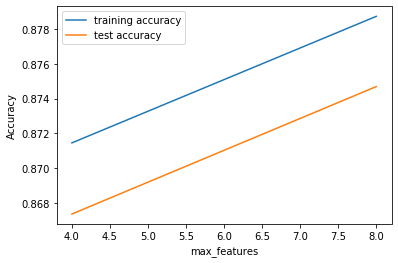

In [39]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
          scores["mean_test_score"], 
          label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_leaf

In [63]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


 # specify number of folds for k-fold CV
n_folds = 5

 # parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

 # instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters,return_train_score=True, 
                     cv=n_folds, 
                    scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [61]:
# # scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           7.49          0.18             0.10            0.01   
1           6.78          0.05             0.09            0.00   
2           6.44          0.08             0.09            0.00   
3           5.93          0.05             0.08            0.00   
4           5.71          0.04             0.08            0.00   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}               0.88   
1                    150  {'min_samples_leaf': 150}               0.88   
2                    200  {'min_samples_leaf': 200}               0.88   
3                    250  {'min_samples_leaf': 250}               0.87   
4                    300  {'min_samples_leaf': 300}               0.87   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0               0.90               0.90               0.89               0.90   
1               0.89               0.89               0.89               0.90   
2               0.89               0.89               0.88               0.89   
3               0.88               0.89               0.88               0.89   
4               0.88               0.88               0.88               0.89   

   mean_test_score  std_test_score  rank_test_score  
0             0.89            0.01                1  
1             0.89            0.01                2  
2             0.89            0.00                3  
3             0.88            0.01                4  
4             0.88            0.01                5

In [62]:
 # plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
          label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
          scores["mean_test_score"], 
          label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

KeyError: 'mean_train_score'

<Figure size 432x288 with 0 Axes>

### Tuning min_samples_split

In [68]:
# # GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# # specify number of folds for k-fold CV
n_folds = 5

# # parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# # instantiate the model
rf = RandomForestClassifier()


 # fit tree on training data
rf = GridSearchCV(rf, parameters,return_train_score=True, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [69]:
# # scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          10.68          0.39             0.11            0.01   
1          11.05          0.64             0.12            0.01   
2          10.53          0.17             0.11            0.00   
3          10.37          0.40             0.10            0.01   
4           9.82          0.43             0.10            0.00   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}               0.89   
1                     250  {'min_samples_split': 250}               0.89   
2                     300  {'min_samples_split': 300}               0.89   
3                     350  {'min_samples_split': 350}               0.89   
4                     400  {'min_samples_split': 400}               0.89   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0               0.91               0.91               0.91  ...   
1               0.91               0.91               0.91  ...   
2               0.90               0.90               0.90  ...   
3               0.90               0.90               0.90  ...   
4               0.90               0.90               0.90  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0             0.91            0.01                1                0.92   
1             0.91            0.01                2                0.92   
2             0.90            0.01                3                0.91   
3             0.90            0.01                4                0.91   
4             0.90            0.01                5                0.91   

   split1_train_score  split2_train_score  split3_train_score  \
0                0.92                0.92                0.92   
1                0.91                0.91                0.91   
2                0.91                0.91                0.91   
3                0.91                0.90                0.91   
4                0.90                0.90                0.90   

   split4_train_score  mean_train_score  std_train_score  
0                0.92              0.92             0.00  
1                0.91              0.91             0.00  
2                0.91              0.91             0.00  
3                0.90              0.91             0.00  
4                0.90              0.90             0.00  

[5 rows x 21 columns]

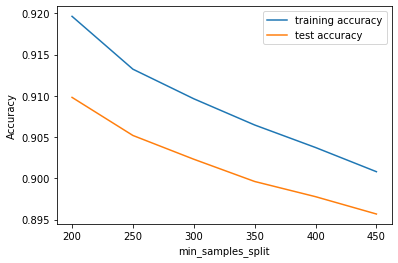

In [70]:
# # plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
          label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
          scores["mean_test_score"], 
          label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

In [52]:
# # Create the parameter grid based on the results of random search 
param_grid = {
     'max_depth': [4,8,10],
     'min_samples_leaf': range(100, 400, 200),
     'min_samples_split': range(200, 500, 200),
     'n_estimators': [100,200, 300], 
     'max_features': [5, 10,20,30,40,50]
 }
# # Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           cv = 3, n_jobs = -1,verbose = 1)

In [53]:
# # Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 62.5min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed: 102.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [54]:
# # printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8963865119933757 using {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [55]:
# # model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                              max_depth=10,
                              min_samples_leaf=100, 
                              min_samples_split=200,
                              max_features=20,
                              n_estimators=200)

In [56]:
# # fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
# # predict
predictions = rfc.predict(X_test)

In [58]:
# # evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8272
           1       0.43      0.77      0.55       729

    accuracy                           0.90      9001
   macro avg       0.70      0.84      0.75      9001
weighted avg       0.93      0.90      0.91      9001

[[7523  749]
 [ 166  563]]


In [59]:
print(accuracy_score(y_test, predictions))

0.898344628374625


OBSERVATIONS
1. Getting ~90.0% accuracy 
2. Confusion matix clearly improved a lot, false positives still exist but reduced.


In [ ]:
##################### End   ########################